<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Modula-o01-07/blob/main/Aula_08_07_FCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrando a biblioteca para resolver EDO:
from scipy.integrate import solve_ivp

# Importando dataclass para fazer chamadas diferentes:
from dataclasses import dataclass

# Importando a biblioteca de gráfico:
import matplotlib.pyplot as plt

# Importando o numpy:
import numpy as np

@dataclass
class Tanque_param:
  To: float = 25.0 # Temperatura inicial (°C)
  Q: float = 5000 #W
  U: float = 150 #W/(m2.°C)
  A: float = 5 #m2
  Tamb: float = 25 #°C
  m: float = 50 #kg
  Cp: float = 1670 #J/(kg.°C)

def Tanque_ae(t, T, params):
  '''
  Essa função calcula a variação da temperatura em função do tempo de um tanque de aquecimento elétrico
  '''
  try:
    if (T < 0):
      raise ValueError ('A temperatura não pode ser negativa')
    if (t < 0):
      raise ValueError ('O tempo não pode ser negativo')

    dTdt = (params.Q - params.U*params.A*(T-params.Tamb))/(params.m*params.Cp)


    return dTdt

  except (ValueError) as e:
    print(f"Erro: {e}")
    return None, None

def simula_aquecimento(t, params):
  '''
  Essa função simula o aquecimento de um tanque de aquecimento elétrico
  '''
  To = params.To
  t_eval = np.linspace(t[0], t[-1], 100)
  sol = solve_ivp(Tanque_ae, t, [To], t_eval = t_eval, args = (params,), method = 'BDF')

  return sol.t, sol.y[0]

params = Tanque_param()

#Valor inicial:
tempo = [0,30*60] # Usando o tempo em (s)

# Chamando a função:
t, T = simula_aquecimento(tempo, params)

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass

@dataclass
class Param:
    T: float = 35.0  # Temperatura (°C)

def ferm_alc(t, So, param):
    '''
    Calcula a taxa de consumo de glicose ao longo do tempo na fermentação alcoólica com dependência da temperatura
    '''
    k = 464.8 * np.exp(-3985 / (param.T + 273))  # L/min
    dSdt = -k * So
    return dSdt

def simula_ferm(So, t, param):
    '''
    Simula a concentração de glicose ao longo do tempo
    '''
    t_eval = np.linspace(t[0], t[-1], 100)
    sol = solve_ivp(ferm_alc, t, [So], t_eval=t_eval, args=(param,), method='BDF')
    return sol.t, sol.y[0]

# Instanciar parâmetros
param = Param()

# Condições iniciais
t = [0, 24*60]  # 24 horas em minutos
So = 100  # concentração inicial

# Simulação
t, S = simula_ferm(So, t, param)

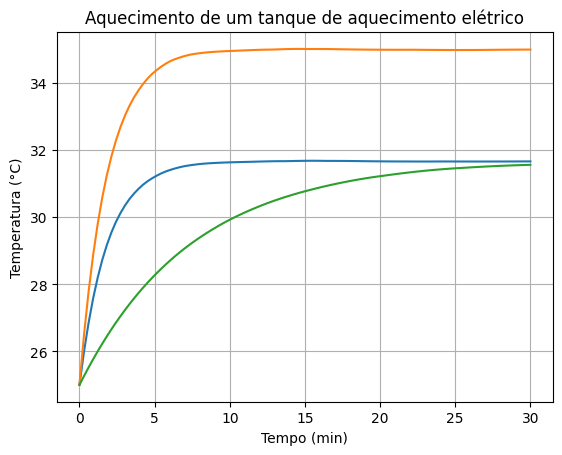

In [3]:
conjunto = [Tanque_param(),
            Tanque_param(Q = 7500),
            Tanque_param(m = 200)]

#Valor inicial:
tempo = [0,30*60] # Usando o tempo em (s)

if np.any(t) and np.any(T) != None:
  for params in conjunto:
    # Chamando a função:
    t, T = simula_aquecimento(tempo, params)
    # Fazendo o gráfico:
    plt.plot(t/60, T, label = f'Q = {params.Q}, m = {params.m}, Tamb = {params.Tamb}')

plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Aquecimento de um tanque de aquecimento elétrico')
plt.grid()
plt.show()

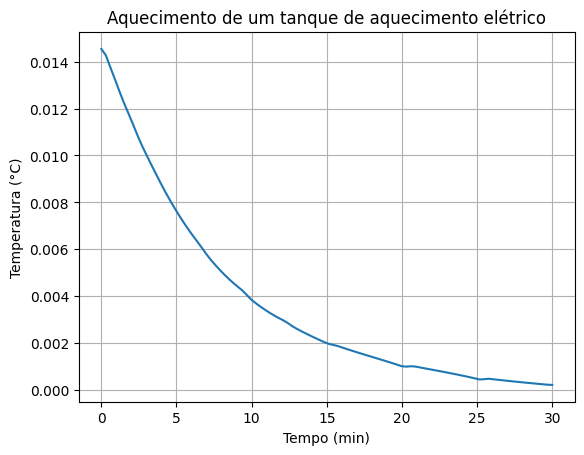

In [4]:
if np.any(t) and np.any(T) != None:
  # Fazendo o gráfico da derivada da temperatura com o tempo:
  dTdt = np.gradient(T,t)
  plt.plot(t/60, dTdt, label = f'Q = {params.Q}, m = {params.m}, Tamb = {params.Tamb}')
  plt.xlabel('Tempo (min)')
  plt.ylabel('Temperatura (°C)')
  plt.title('Aquecimento de um tanque de aquecimento elétrico')
  plt.grid()
  plt.show()

In [5]:
import pandas as pd

resultado = pd.DataFrame({'t':t, 'T': T, 'dTdt': dTdt})
resultado.to_csv('resultado.csv', index = False)